In [34]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from dotenv import load_dotenv
import os

load_dotenv()

True

In [35]:
#pulling in breweries, first pull showed they paginate, so had to adjust the api request to pull in all of the pages
brewery_api_url = "https://api.openbrewerydb.org/v1/breweries"

all_breweries = []

page = 1
while True:
    response = requests.get(brewery_api_url, params={"page": page, "per_page": 50})
    brewery_data = response.json()
    
    if not brewery_data:
        break
        
    all_breweries.extend(brewery_data)
    
    page += 1
    
brewery_df = pd.DataFrame(all_breweries)
print(f"Total breweries fetched: {len(brewery_df)}")

Total breweries fetched: 8355


In [36]:
#api key
api_key = os.getenv("MY-API-KEY")

#api url and headers
url = "https://obesity-by-state.p.rapidapi.com/records"
headers = {
    "X-RapidAPI-Key": api_key,
    "X-RapidAPI-Host": "obesity-by-state.p.rapidapi.com"
}

# Make a request to the API
response = requests.get(url, headers=headers)
data = response.json()

#convert api data to dataframe
obesity_df = pd.DataFrame(data)

In [37]:
#taking a quick look at the data
brewery_df.head()

,id,name,brewery_type,address_1,address_2,address_3,city,state_province,postal_code,country,longitude,latitude,phone,website_url,state,street
0,5128df48-79fc-4f0f-8b52-d06be54d0cec,(405) Brewing Co,micro,1716 Topeka St,None,None,Norman,Oklahoma,73069-8224,United States,-97.46818222,35.25738891,4058160490,http://www.405brewing.com,Oklahoma,1716 Topeka St
1,9c5a66c8-cc13-416f-a5d9-0a769c87d318,(512) Brewing Co,micro,407 Radam Ln Ste F200,None,None,Austin,Texas,78745-1197,United States,None,None,5129211545,http://www.512brewing.com,Texas,407 Radam Ln Ste F200
2,34e8c68b-6146-453f-a4b9-1f6cd99a5ada,1 of Us Brewing Company,micro,8100 Washington Ave,None,None,Mount Pleasant,Wisconsin,53406-3920,United States,-87.88336350209435,42.72010826899558,2624847553,https://www.1ofusbrewing.com,Wisconsin,8100 Washington Ave
3,ef970757-fe42-416f-931d-722451f1f59c,10 Barrel Brewing Co,large,1501 E St,None,None,San Diego,California,92101-6618,United States,-117.129593,32.714813,6195782311,http://10barrel.com,California,1501 E St
4,6d14b220-8926-4521-8d19-b98a2d6ec3db,10 Barrel Brewing Co,large,62970 18th St,None,None,Bend,Oregon,97701-9847,United States,-121.281706,44.08683531,5415851007,http://www.10barrel.com,Oregon,62970 18th St


In [38]:
#checking for nulls and all of the columns for the dataframe
brewery_df.info()
brewery_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8355 entries, 0 to 8354
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              8355 non-null   object
 1   name            8355 non-null   object
 2   brewery_type    8355 non-null   object
 3   address_1       7591 non-null   object
 4   address_2       108 non-null    object
 5   address_3       35 non-null     object
 6   city            8355 non-null   object
 7   state_province  8355 non-null   object
 8   postal_code     8355 non-null   object
 9   country         8355 non-null   object
 10  longitude       6027 non-null   object
 11  latitude        6027 non-null   object
 12  phone           7504 non-null   object
 13  website_url     7166 non-null   object
 14  state           8355 non-null   object
 15  street          7591 non-null   object
dtypes: object(16)
memory usage: 1.0+ MB


Index(['id', 'name', 'brewery_type', 'address_1', 'address_2', 'address_3',
       'city', 'state_province', 'postal_code', 'country', 'longitude',
       'latitude', 'phone', 'website_url', 'state', 'street'],
      dtype='object')

In [39]:
#making sure we only use US breweries
us_brewery_df = brewery_df[brewery_df['country'] == 'United States']

#checking for nulls and columns
us_brewery_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8031 entries, 0 to 8296
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              8031 non-null   object
 1   name            8031 non-null   object
 2   brewery_type    8031 non-null   object
 3   address_1       7267 non-null   object
 4   address_2       7 non-null      object
 5   address_3       0 non-null      object
 6   city            8031 non-null   object
 7   state_province  8031 non-null   object
 8   postal_code     8031 non-null   object
 9   country         8031 non-null   object
 10  longitude       5709 non-null   object
 11  latitude        5709 non-null   object
 12  phone           7236 non-null   object
 13  website_url     6903 non-null   object
 14  state           8031 non-null   object
 15  street          7267 non-null   object
dtypes: object(16)
memory usage: 1.0+ MB


In [40]:
#checking the head to see the data
us_brewery_df.head(25)

,id,name,brewery_type,address_1,address_2,address_3,city,state_province,postal_code,country,longitude,latitude,phone,website_url,state,street
0,5128df48-79fc-4f0f-8b52-d06be54d0cec,(405) Brewing Co,micro,1716 Topeka St,None,None,Norman,Oklahoma,73069-8224,United States,-97.46818222,35.25738891,4058160490,http://www.405brewing.com,Oklahoma,1716 Topeka St
1,9c5a66c8-cc13-416f-a5d9-0a769c87d318,(512) Brewing Co,micro,407 Radam Ln Ste F200,None,None,Austin,Texas,78745-1197,United States,None,None,5129211545,http://www.512brewing.com,Texas,407 Radam Ln Ste F200
2,34e8c68b-6146-453f-a4b9-1f6cd99a5ada,1 of Us Brewing Company,micro,8100 Washington Ave,None,None,Mount Pleasant,Wisconsin,53406-3920,United States,-87.88336350209435,42.72010826899558,2624847553,https://www.1ofusbrewing.com,Wisconsin,8100 Washington Ave
3,ef970757-fe42-416f-931d-722451f1f59c,10 Barrel Brewing Co,large,1501 E St,None,None,San Diego,California,92101-6618,United States,-117.129593,32.714813,6195782311,http://10barrel.com,California,1501 E St
4,6d14b220-8926-4521-8d19-b98a2d6ec3db,10 Barrel Brewing Co,large,62970 18th St,None,None,Bend,Oregon,97701-9847,United States,-121.281706,44.08683531,5415851007,http://www.10barrel.com,Oregon,62970 18th St
5,e2e78bd8-80ff-4a61-a65c-3bfbd9d76ce2,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,None,None,Bend,Oregon,97703-2465,United States,-121.3288021,44.0575649,5415851007,None,Oregon,1135 NW Galveston Ave Ste B
6,e432899b-7f58-455f-9c7b-9a6e2130a1e0,10 Barrel Brewing Co,large,1411 NW Flanders St,None,None,Portland,Oregon,97209-2620,United States,-122.6855056,45.5259786,5032241700,http://www.10barrel.com,Oregon,1411 NW Flanders St
7,9f1852da-c312-42da-9a31-097bac81c4c0,10 Barrel Brewing Co - Bend Pub,large,62950 NE 18th St,None,None,Bend,Oregon,97701,United States,-121.2809536,44.0912109,5415851007,None,Oregon,62950 NE 18th St
8,ea4f30c0-bce6-416b-8904-fab4055a7362,10 Barrel Brewing Co - Boise,large,826 W Bannock St,None,None,Boise,Idaho,83702-5857,United States,-116.202929,43.618516,2083445870,http://www.10barrel.com,Idaho,826 W Bannock St
9,1988eb86-f0a2-4674-ba04-02454efa0d31,10 Barrel Brewing Co - Denver,large,2620 Walnut St,None,None,Denver,Colorado,80205-2231,United States,-104.9853655,39.7592508,7205738992,None,Colorado,2620 Walnut St


In [41]:
#checking the tail to see the data
us_brewery_df.tail(25)

,id,name,brewery_type,address_1,address_2,address_3,city,state_province,postal_code,country,longitude,latitude,phone,website_url,state,street
8270,e1278d06-ae74-4c23-9103-8ef505d24f5b,Zebulon Artisan Ales,micro,8 Merchents Alley,None,None,Weaverville,North Carolina,28787-8860,United States,None,None,None,http://www.zebulonbrewing.com,North Carolina,8 Merchents Alley
8271,800c3ec9-66e0-4bff-a3d9-13a7d1a1755e,Zed's Beer/Bado Brewing,micro,19 N Maple Ave Unit B,None,None,Marlton,New Jersey,08053-3007,United States,None,None,8568727632,http://drinkzeds.com,New Jersey,19 N Maple Ave Unit B
8272,3b703b36-86bb-4d24-846d-80c88bf7df07,ZeLUS Beer Company,contract,120 N Meadows Rd,None,None,Medfield,Massachusetts,02052-1594,United States,-71.335472,42.200799,6275100270,http://www.zelusbeer.com,Massachusetts,120 N Meadows Rd
8273,1cbf4f83-1e05-4025-8517-89353a77f1ad,Zephyr Brewing Co,micro,1609 E 58th Ave Ste G,None,None,Denver,Colorado,80216-1528,United States,None,None,7202959374,http://www.zephyrbrewingco.com,Colorado,1609 E 58th Ave Ste G
8274,698fe7e8-85e4-4482-b608-43534a67862a,Zephyrhills Brewing Company,proprietor,38530 5th Ave,None,None,Zephyrhills,Florida,33542-4318,United States,-82.17921783,28.23444039,8137152683,http://www.zbcbeer.com,Florida,38530 5th Ave
8275,c9de9083-60d9-46d4-9544-b20b5f5d1556,Zero Gravity Craft Brewery,micro,716 Pinte Street,None,None,Burlington,Vermont,05401,United States,None,None,8024970054,None,Vermont,716 Pinte Street
8276,f192e49e-e2c9-485a-bdee-35ce3189ef93,Zero Gravity Craft Brewery,brewpub,716 Pine St,None,None,Burlington,Vermont,05401-4922,United States,-73.2140363,44.4595462,8024970054,http://www.zerogravitybeer.com,Vermont,716 Pine St
8277,1d15aa31-6d4c-42c7-b5c7-e0d3fe314e1b,Zero One Ale House,brewpub,20 W Beauregard Ave,None,None,San Angelo,Texas,76903-5833,United States,-100.4372363,31.46245419,3256535123,None,Texas,20 W Beauregard Ave
8278,1e64c937-e250-448e-962a-f2a40d6ca9db,Zeroday Brewing Company,brewpub,250 Reily St Ste 103,None,None,Harrisburg,Pennsylvania,17102-2550,United States,-76.8915931,40.2717061,7177456218,http://www.zerodaybrewing.com,Pennsylvania,250 Reily St Ste 103
8279,06244489-87fd-44ea-8a83-f0b3f1210314,Zeta Brewing Company,brewpub,131 1st Ave N,None,None,Jacksonville Beach,Florida,32250-6912,United States,-81.39029104,30.29038796,9043720727,http://www.zetabrewing.com,Florida,131 1st Ave N


In [42]:
#dropping unnecessary or duplicate columns
us_brewery_df2 = us_brewery_df.drop(columns=['address_2', 'address_3', 'longitude', 'latitude', 'phone', 'state', 'street', 'website_url'])

us_brewery_df2

,id,name,brewery_type,address_1,city,state_province,postal_code,country
0,5128df48-79fc-4f0f-8b52-d06be54d0cec,(405) Brewing Co,micro,1716 Topeka St,Norman,Oklahoma,73069-8224,United States
1,9c5a66c8-cc13-416f-a5d9-0a769c87d318,(512) Brewing Co,micro,407 Radam Ln Ste F200,Austin,Texas,78745-1197,United States
2,34e8c68b-6146-453f-a4b9-1f6cd99a5ada,1 of Us Brewing Company,micro,8100 Washington Ave,Mount Pleasant,Wisconsin,53406-3920,United States
3,ef970757-fe42-416f-931d-722451f1f59c,10 Barrel Brewing Co,large,1501 E St,San Diego,California,92101-6618,United States
4,6d14b220-8926-4521-8d19-b98a2d6ec3db,10 Barrel Brewing Co,large,62970 18th St,Bend,Oregon,97701-9847,United States
...,...,...,...,...,...,...,...,...
8292,a602e9ea-f0b3-4a40-8aa8-02e0aace191c,Zwei Brewing Co,micro,4612 S Mason St Ste 120,Fort Collins,Colorado,80525-3794,United States
8293,8d18da7a-1ed9-4eb4-b87c-ac444aa81e14,Zydeco Brew Werks,brewpub,1902 E 7th Ave,Tampa,Florida,33605-3810,United States
8294,aabc26d3-4870-42e9-ae09-1333f85c3246,Zymos Brewing,micro,5180 S Lowell Blvd,Littleton,Colorado,80123,United States
8295,82234375-c7fa-4208-8878-b661b7a1e6aa,Zymurcracy Beer Company,micro,4624 Creek Dr Ste 6,Rapid City,South Dakota,57701-2165,United States


In [43]:
#checking for any nulls in the brewery type data
us_brewery_df2['brewery_type'].isnull().sum()

#checking for any values that were not expected
us_brewery_df2['brewery_type'].unique()

array(['micro', 'large', 'closed', 'brewpub', 'proprietor', 'contract',
       'regional', 'planning', 'taproom', 'nano', 'bar', 'location'],
      dtype=object)

In [44]:
#removing types that aren't breweries, currently open and a random type (location) that exists
unuseful_types = ['location', 'bar', 'closed', 'planning']
us_brewery_df3 = us_brewery_df2[~us_brewery_df2['brewery_type'].isin(unuseful_types)]

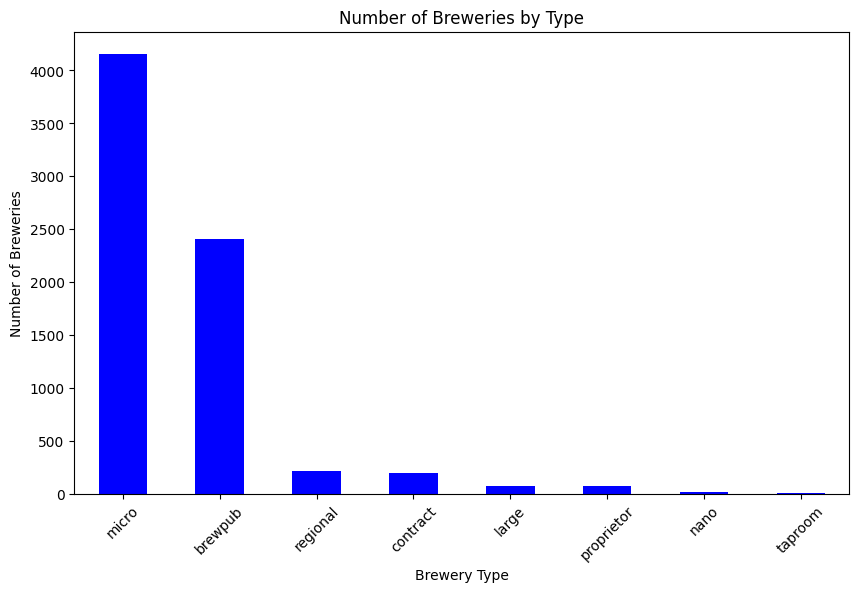

In [45]:
#counting how many breweries fall within each type
us_brewery_counts = us_brewery_df3['brewery_type'].value_counts()

#bar chart for the brewery types
plt.figure(figsize=(10, 6))
us_brewery_counts.plot(kind='bar', color='blue')
plt.title('Number of Breweries by Type')
plt.xlabel('Brewery Type')
plt.ylabel('Number of Breweries')
plt.xticks(rotation=45)
plt.show()

In [46]:
#created a copy of the dataframe to avoid a slice issue, jupyter notebook said I originally created a slice issue
us_brewery_df4 = us_brewery_df3.copy()

#cleaned the state_province column, there was a MIssouri and a space before a Utah
us_brewery_df4['state_province'] = us_brewery_df4['state_province'].str.strip().str.title()

#grouped by state and counted the number in each state
breweries_by_state = us_brewery_df4.groupby('state_province').size()

In [47]:
#took the series dataframe produced by the groupby and turned it back into a dataframe
breweries_for_map = breweries_by_state.reset_index(name='brewery_count')

#adjusted the column names
breweries_for_map.columns = ['State', 'brewery_count']

#per plotlyexpress documentation it requires state abbreviations to run plotly and not the name of the state so converted names to abbreviations
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District Of Columbia': 'DC', 'Florida': 'FL',
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN',
    'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME',
    'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

#connect state names to their abbreviations
breweries_for_map['state_abbr'] = breweries_for_map['State'].map(state_abbreviations)

#create us map
fig = px.choropleth(breweries_for_map, 
                    locations='state_abbr', 
                    locationmode='USA-states',
                    color='brewery_count',
                    color_continuous_scale='YlGnBu',
                    labels={'brewery_count': 'Number of Breweries'},
                    title='Number of Breweries by State in the US',
                    scope='usa')
fig.show()

#Obesity Data

In [48]:
# Display the DataFrame
obesity_df.head(60)

,data,count,maxIndex
0,"{'dataListIndex': '0', 'fid': '1', 'name': 'Te...",52,0
1,"{'dataListIndex': '1', 'fid': '2', 'name': 'Ca...",52,0
2,"{'dataListIndex': '2', 'fid': '3', 'name': 'Ke...",52,0
3,"{'dataListIndex': '3', 'fid': '4', 'name': 'Ge...",52,0
4,"{'dataListIndex': '4', 'fid': '5', 'name': 'Wi...",52,0
5,"{'dataListIndex': '5', 'fid': '6', 'name': 'Or...",52,0
6,"{'dataListIndex': '6', 'fid': '7', 'name': 'Vi...",52,0
7,"{'dataListIndex': '7', 'fid': '8', 'name': 'Te...",52,0
8,"{'dataListIndex': '8', 'fid': '9', 'name': 'Lo...",52,0
9,"{'dataListIndex': '9', 'fid': '10', 'name': 'N...",52,0


In [49]:
#looking at the data for the columns and its types
obesity_df.info()
obesity_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   data      52 non-null     object
 1   count     52 non-null     int64 
 2   maxIndex  52 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


Index(['data', 'count', 'maxIndex'], dtype='object')

In [50]:
#looking to see why its not making an easy to use dataframe
type(data)

dict

In [51]:
#looking for the keys since its a dictionary
data.keys()

dict_keys(['data', 'count', 'maxIndex'])

In [52]:
#looking at the data
obesity_records = data['data']
obesity_records

[{'dataListIndex': '0',
  'fid': '1',
  'name': 'Texas',
  'obesity': '32.4',
  'shapeLength': '15408321.8698148',
  'shapeArea': '7672329221262.61'},
 {'dataListIndex': '1',
  'fid': '2',
  'name': 'California',
  'obesity': '24.2',
  'shapeLength': '14518698.4566722',
  'shapeArea': '5327809415403.01'},
 {'dataListIndex': '2',
  'fid': '3',
  'name': 'Kentucky',
  'obesity': '34.6',
  'shapeLength': '6346698.58704225',
  'shapeArea': '1128830286256.75'},
 {'dataListIndex': '3',
  'fid': '4',
  'name': 'Georgia',
  'obesity': '30.7',
  'shapeLength': '5795595.91737164',
  'shapeArea': '1652980281864.84'},
 {'dataListIndex': '4',
  'fid': '5',
  'name': 'Wisconsin',
  'obesity': '30.7',
  'shapeLength': '6806782.08358127',
  'shapeArea': '1567816094351.9'},
 {'dataListIndex': '5',
  'fid': '6',
  'name': 'Oregon',
  'obesity': '30.1',
  'shapeLength': '7976010.9415358',
  'shapeArea': '3178445626071.46'},
 {'dataListIndex': '6',
  'fid': '7',
  'name': 'Virginia',
  'obesity': '29.2',


In [53]:
#creating a list to add the data to
df_data = []

#looping over the data to pull it out
for n in obesity_records:
    state = n['name']
    obesity_rate = n['obesity']
    df_data.append({'State': state, 'Obesity Rate': obesity_rate})
    
obesity_df = pd.DataFrame(df_data)
obesity_df

,State,Obesity Rate
0,Texas,32.4
1,California,24.2
2,Kentucky,34.6
3,Georgia,30.7
4,Wisconsin,30.7
5,Oregon,30.1
6,Virginia,29.2
7,Tennessee,33.8
8,Louisiana,36.2
9,New York,25


In [54]:
#per plotlyexpress documentation it requires state abbreviations to run plotly and not the name of the state so converted names to abbreviations
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District Of Columbia': 'DC', 'Florida': 'FL',
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN',
    'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME',
    'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

#connected state names to their abbreviations
obesity_df['state_abbr'] = obesity_df['State'].map(state_abbreviations)

#changed obesity string data into numeric data
obesity_df['Obesity Rate'] = pd.to_numeric(obesity_df['Obesity Rate'], errors='coerce')

#create us map
fig = px.choropleth(obesity_df, 
                    locations='state_abbr', 
                    locationmode='USA-states',
                    color='Obesity Rate',
                    color_continuous_scale=px.colors.sequential.Plasma[::-1],  # Choose a color scale
                    range_color=[20, 40],
                    labels={'Obesity Rate': 'Rate of Obesity'},
                    title='Obesity rate in the United States',
                    scope='usa')

fig.show()

In [55]:
#Looking at the obesity numbers using descriptinve stats
obesity_stats = obesity_df['Obesity Rate'].describe()
obesity_stats

count    52.000000
mean     29.286538
std       3.832832
min      20.200000
25%      26.250000
50%      29.800000
75%      31.475000
max      36.200000
Name: Obesity Rate, dtype: float64

#Merging the dataframes

In [56]:
#determining what column to merge on
print(obesity_df.columns)
print(breweries_for_map.columns)

Index(['State', 'Obesity Rate', 'state_abbr'], dtype='object')
Index(['State', 'brewery_count', 'state_abbr'], dtype='object')


In [57]:
#making the state_abbr column consistent
obesity_df['state_abbr'] = obesity_df['state_abbr'].str.upper()
breweries_for_map['state_abbr'] = breweries_for_map['state_abbr'].str.upper()

In [58]:
#Merging the dataframes
merged_df = pd.merge(obesity_df, breweries_for_map, on='state_abbr', how='inner')

merged_df.head()

,State_x,Obesity Rate,state_abbr,State_y,brewery_count
0,Texas,32.4,TX,Texas,293
1,California,24.2,CA,California,801
2,Kentucky,34.6,KY,Kentucky,55
3,Georgia,30.7,GA,Georgia,81
4,Wisconsin,30.7,WI,Wisconsin,206


In [59]:
#drop extra state column
merged_df.drop(columns=['State_y'], inplace=True)

In [60]:
#making sure the merge worked
merged_df.head()

,State_x,Obesity Rate,state_abbr,brewery_count
0,Texas,32.4,TX,293
1,California,24.2,CA,801
2,Kentucky,34.6,KY,55
3,Georgia,30.7,GA,81
4,Wisconsin,30.7,WI,206


In [61]:
#renaming state_x
merged_df.rename(columns={'State_x': 'State'}, inplace=True)

In [62]:
#making sure the drop worked
merged_df.head()

,State,Obesity Rate,state_abbr,brewery_count
0,Texas,32.4,TX,293
1,California,24.2,CA,801
2,Kentucky,34.6,KY,55
3,Georgia,30.7,GA,81
4,Wisconsin,30.7,WI,206


In [63]:
#looking to see if there is correlation
merged_df[['Obesity Rate', 'brewery_count']].corr()

,Obesity Rate,brewery_count
Obesity Rate,1.000000,-0.334883
brewery_count,-0.334883,1.000000


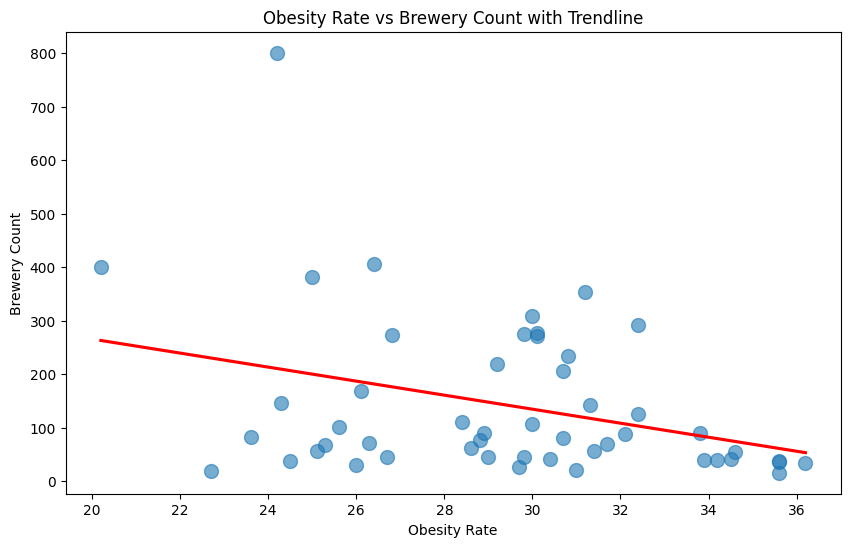

In [64]:
#matplotlib scatterplot with regression line
plt.figure(figsize=(10,6))
sns.regplot(x='Obesity Rate', y='brewery_count', data=merged_df, scatter_kws={'s': 100, 'alpha': 0.6}, line_kws={'color': 'red'}, ci=None)
plt.title('Obesity Rate vs Brewery Count with Trendline')
plt.xlabel('Obesity Rate')
plt.ylabel('Brewery Count')
plt.show()